## Salary Prediction

### EDA

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("CAGEDMOV202207.txt", sep=";")
ocup = pd.read_excel('Layout-Caged.xlsx', sheet_name='cbo2002ocupação')


In [3]:
# Treated dataframe to speed up the process
df = pd.read_csv("CAGEDMOV202207.csv")

In [3]:
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202207,2,26,261160,N,8121400,-1,351305,101,7,...,0,0,"2403,79",7,0,1,202207,0,5,"2403,79"
1,202207,4,41,410400,P,8591100,-1,422105,101,7,...,0,0,"1524,60",1,0,1,202207,0,5,"1524,60"
2,202207,2,25,250400,G,4691500,1,784105,101,7,...,0,1,"826,50",7,0,1,202207,0,5,"826,50"


In [4]:
ocup.head(3)

,Código,Descrição
0,10105,Oficial General da Aeronautica
1,10110,Oficial General do Exercito
2,10115,Oficial General da Marinha


In [5]:
df = pd.merge(df, ocup, left_on='cbo2002ocupação', right_on='Código', how='inner',indicator=False).drop(columns = ['Código'])

In [6]:
df.sample(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
1569316,202207,3,32,320320,G,4711302,-1,521125,103,5,...,0,"647,63",7,1,1,202207,0,5,"647,63",Repositor de Mercadorias
677582,202207,3,31,312760,G,4744099,1,524105,101,7,...,0,"1318,04",5,0,1,202207,0,5,"1318,04",Vendedor em Domicilio
2279824,202207,1,13,130260,I,5611201,-1,513405,101,6,...,0,"1250,00",4,0,1,202207,0,5,"1250,00",Garcom


In [7]:
# Filtering (uf = SP | city = São Paulo | CBO = 212 [Aréas relacionadas a tecnologia])
df = df[(df.uf == 35) & (df.município == 355030) & (df.cbo2002ocupação.isin([212205, 212210, 212215, 212305, 212310, 212315, 212320, 212405, 212410, 212415, 212420, 212425, 212430]))]
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,"5000,00",5,0,1,202207,0,5,"5000,00",Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,9,...,0,"8600,00",10,0,1,202207,0,5,"8600,00",Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,8,...,0,"5153,59",7,0,1,202207,0,5,"5153,59",Analista de Sistemas de Automacao


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 2351401 to 3531670
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competênciamov          8936 non-null   int64  
 1   região                  8936 non-null   int64  
 2   uf                      8936 non-null   int64  
 3   município               8936 non-null   int64  
 4   seção                   8936 non-null   object 
 5   subclasse               8936 non-null   int64  
 6   saldomovimentação       8936 non-null   int64  
 7   cbo2002ocupação         8936 non-null   int64  
 8   categoria               8936 non-null   int64  
 9   graudeinstrução         8936 non-null   int64  
 10  idade                   8936 non-null   float64
 11  horascontratuais        8935 non-null   object 
 12  raçacor                 8936 non-null   int64  
 13  sexo                    8936 non-null   int64  
 14  tipoempregador          8936 no

In [9]:
df.shape

(8936, 29)

In [10]:
(df.isna().sum() / len(df)) * 100

competênciamov            0.000000
região                    0.000000
uf                        0.000000
município                 0.000000
seção                     0.000000
subclasse                 0.000000
saldomovimentação         0.000000
cbo2002ocupação           0.000000
categoria                 0.000000
graudeinstrução           0.000000
idade                     0.000000
horascontratuais          0.011191
raçacor                   0.000000
sexo                      0.000000
tipoempregador            0.000000
tipoestabelecimento       0.000000
tipomovimentação          0.000000
tipodedeficiência         0.000000
indtrabintermitente       0.000000
indtrabparcial            0.000000
salário                   0.000000
tamestabjan               0.000000
indicadoraprendiz         0.000000
origemdainformação        0.000000
competênciadec            0.000000
indicadordeforadoprazo    0.000000
unidadesaláriocódigo      0.000000
valorsaláriofixo          0.000000
Descrição           

In [11]:
df['horascontratuais'].isnull().sum()

1

In [12]:
# Fill NaN values by MODE

df['horascontratuais'].fillna(df['horascontratuais'].value_counts().idxmax() , axis=0 ,inplace=True)

In [13]:
# unidadesaláriocódigo = 5 [Monthly Wage] 15 = [Hour] 1 = [N/A]  )
df.unidadesaláriocódigo.value_counts()

5     8920
1       15
99       1
Name: unidadesaláriocódigo, dtype: int64

In [14]:
# Filtering (unidadesaláriocódigo = 5 [Monthly Wage])
df = df[(df.unidadesaláriocódigo == 5)]
df.unidadesaláriocódigo.value_counts()

5    8920
Name: unidadesaláriocódigo, dtype: int64

In [15]:
df['salário'] = df['salário'].str.replace(',','.').astype(float)
df['valorsaláriofixo'] = df['valorsaláriofixo'].str.replace(',','.').astype(float)
df['horascontratuais'] = df['horascontratuais'].str.replace(',','.').astype(float)

In [16]:
# Grouping graudeinstrução 2: "Até 5ª Incompleto", 3: "5ª Completo Fundamental", 4: "6ª a 9ª Fundamental", 5: "Fundamental Completo", 6: "Médio Incompleto" em médio incompleto

df["graudeinstrução"] = df["graudeinstrução"].replace([2, 3, 4, 5, 6], 2) # Médio Incompleto
df["graudeinstrução"] = df["graudeinstrução"].replace([7], 3) # Médio Completo
df["graudeinstrução"] = df["graudeinstrução"].replace([8], 4) # Superior Incompleto
df["graudeinstrução"] = df["graudeinstrução"].replace([9], 5) # Superior Completo
df["graudeinstrução"] = df["graudeinstrução"].replace([10], 6) # Mestrado
df["graudeinstrução"] = df["graudeinstrução"].replace([11], 7) # Doutorado
df["graudeinstrução"] = df["graudeinstrução"].replace([80], 8) # Pós completa


df[["graudeinstrução"]].value_counts(sort = False) # Checking the frequency

graudeinstrução
1                     8
2                    62
3                  1199
4                  1555
5                  5001
6                   143
7                    44
8                   908
dtype: int64

In [17]:
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,5,...,0,5000.00,5,0,1,202207,0,5,5000.00,Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,5,...,0,8600.00,10,0,1,202207,0,5,8600.00,Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,4,...,0,5153.59,7,0,1,202207,0,5,5153.59,Analista de Sistemas de Automacao


In [18]:
pd.DataFrame({'Columns': df.nunique().index , 'Number of unique values':  df.nunique().values})

,Columns,Number of unique values
0,competênciamov,1
1,região,1
2,uf,1
3,município,1
4,seção,19
5,subclasse,329
6,saldomovimentação,2
7,cbo2002ocupação,13
8,categoria,6
9,graudeinstrução,8


In [19]:
var_quant = [
    "idade", 
    "horascontratuais", 
    "salário", 
    "valorsaláriofixo"]

var_qua = [
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "unidadesaláriocódigo"
]

var_quali = [
    "região",
    "uf",
    "município",
    "seção",
    "subclasse",
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "competênciadec",
    "competênciaexc",
    "indicadordeexclusão",
    "indicadordeforadoprazo",
    "unidadesaláriocódigo"
]

label_quali = {
  "sexo": {1: 'M', 3: 'F', 9: 'Não Identificado'},
  "raçacor": {1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não informada', 9: 'Não Identificado'},
  "graudeinstrução": {1: "Analfabeto", 2: "Médio Incompleto", 3: "Médio Completo", 4: "Superior Incompleto", 5: "Superior Completo", 6: "Mestrado", 7: "Doutorado", 8: "Pós completa", 99: "Não Identificado"},
  
}

In [20]:
def generate_plot(df, row, col):
    plt.figure(figsize=(25,40));
    for i, feat in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[feat].dtypes == 'object':
            sns.countplot(y=df[feat])
            #plt.xticks(rotation=90)
            plt.tight_layout();
        else:
            sns.distplot(x=df[feat], color='c')
            plt.tight_layout();
            plt.xlabel(feat);

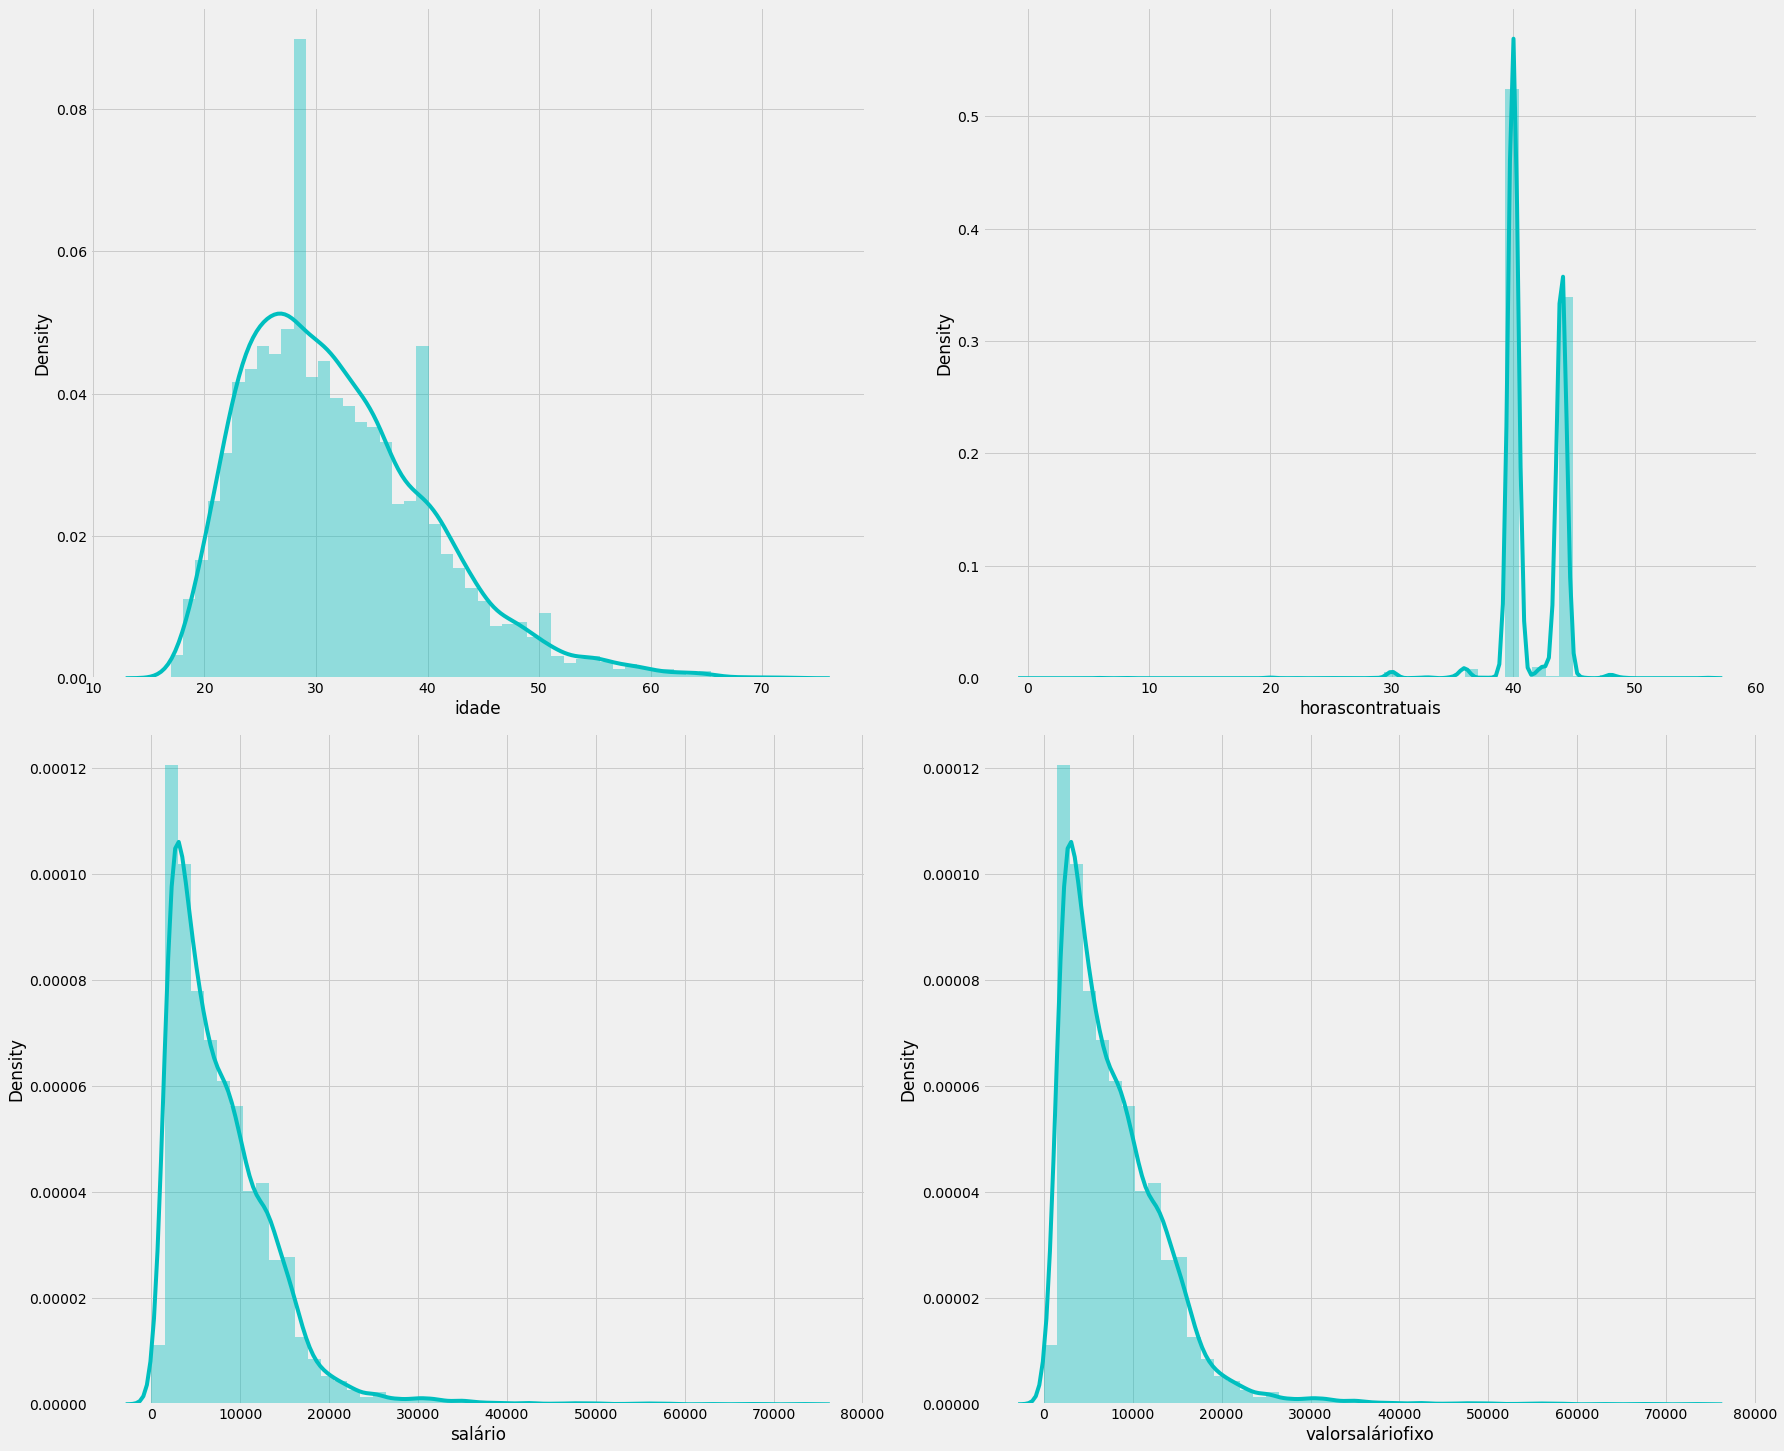

In [21]:
generate_plot(df[var_quant],4,2)

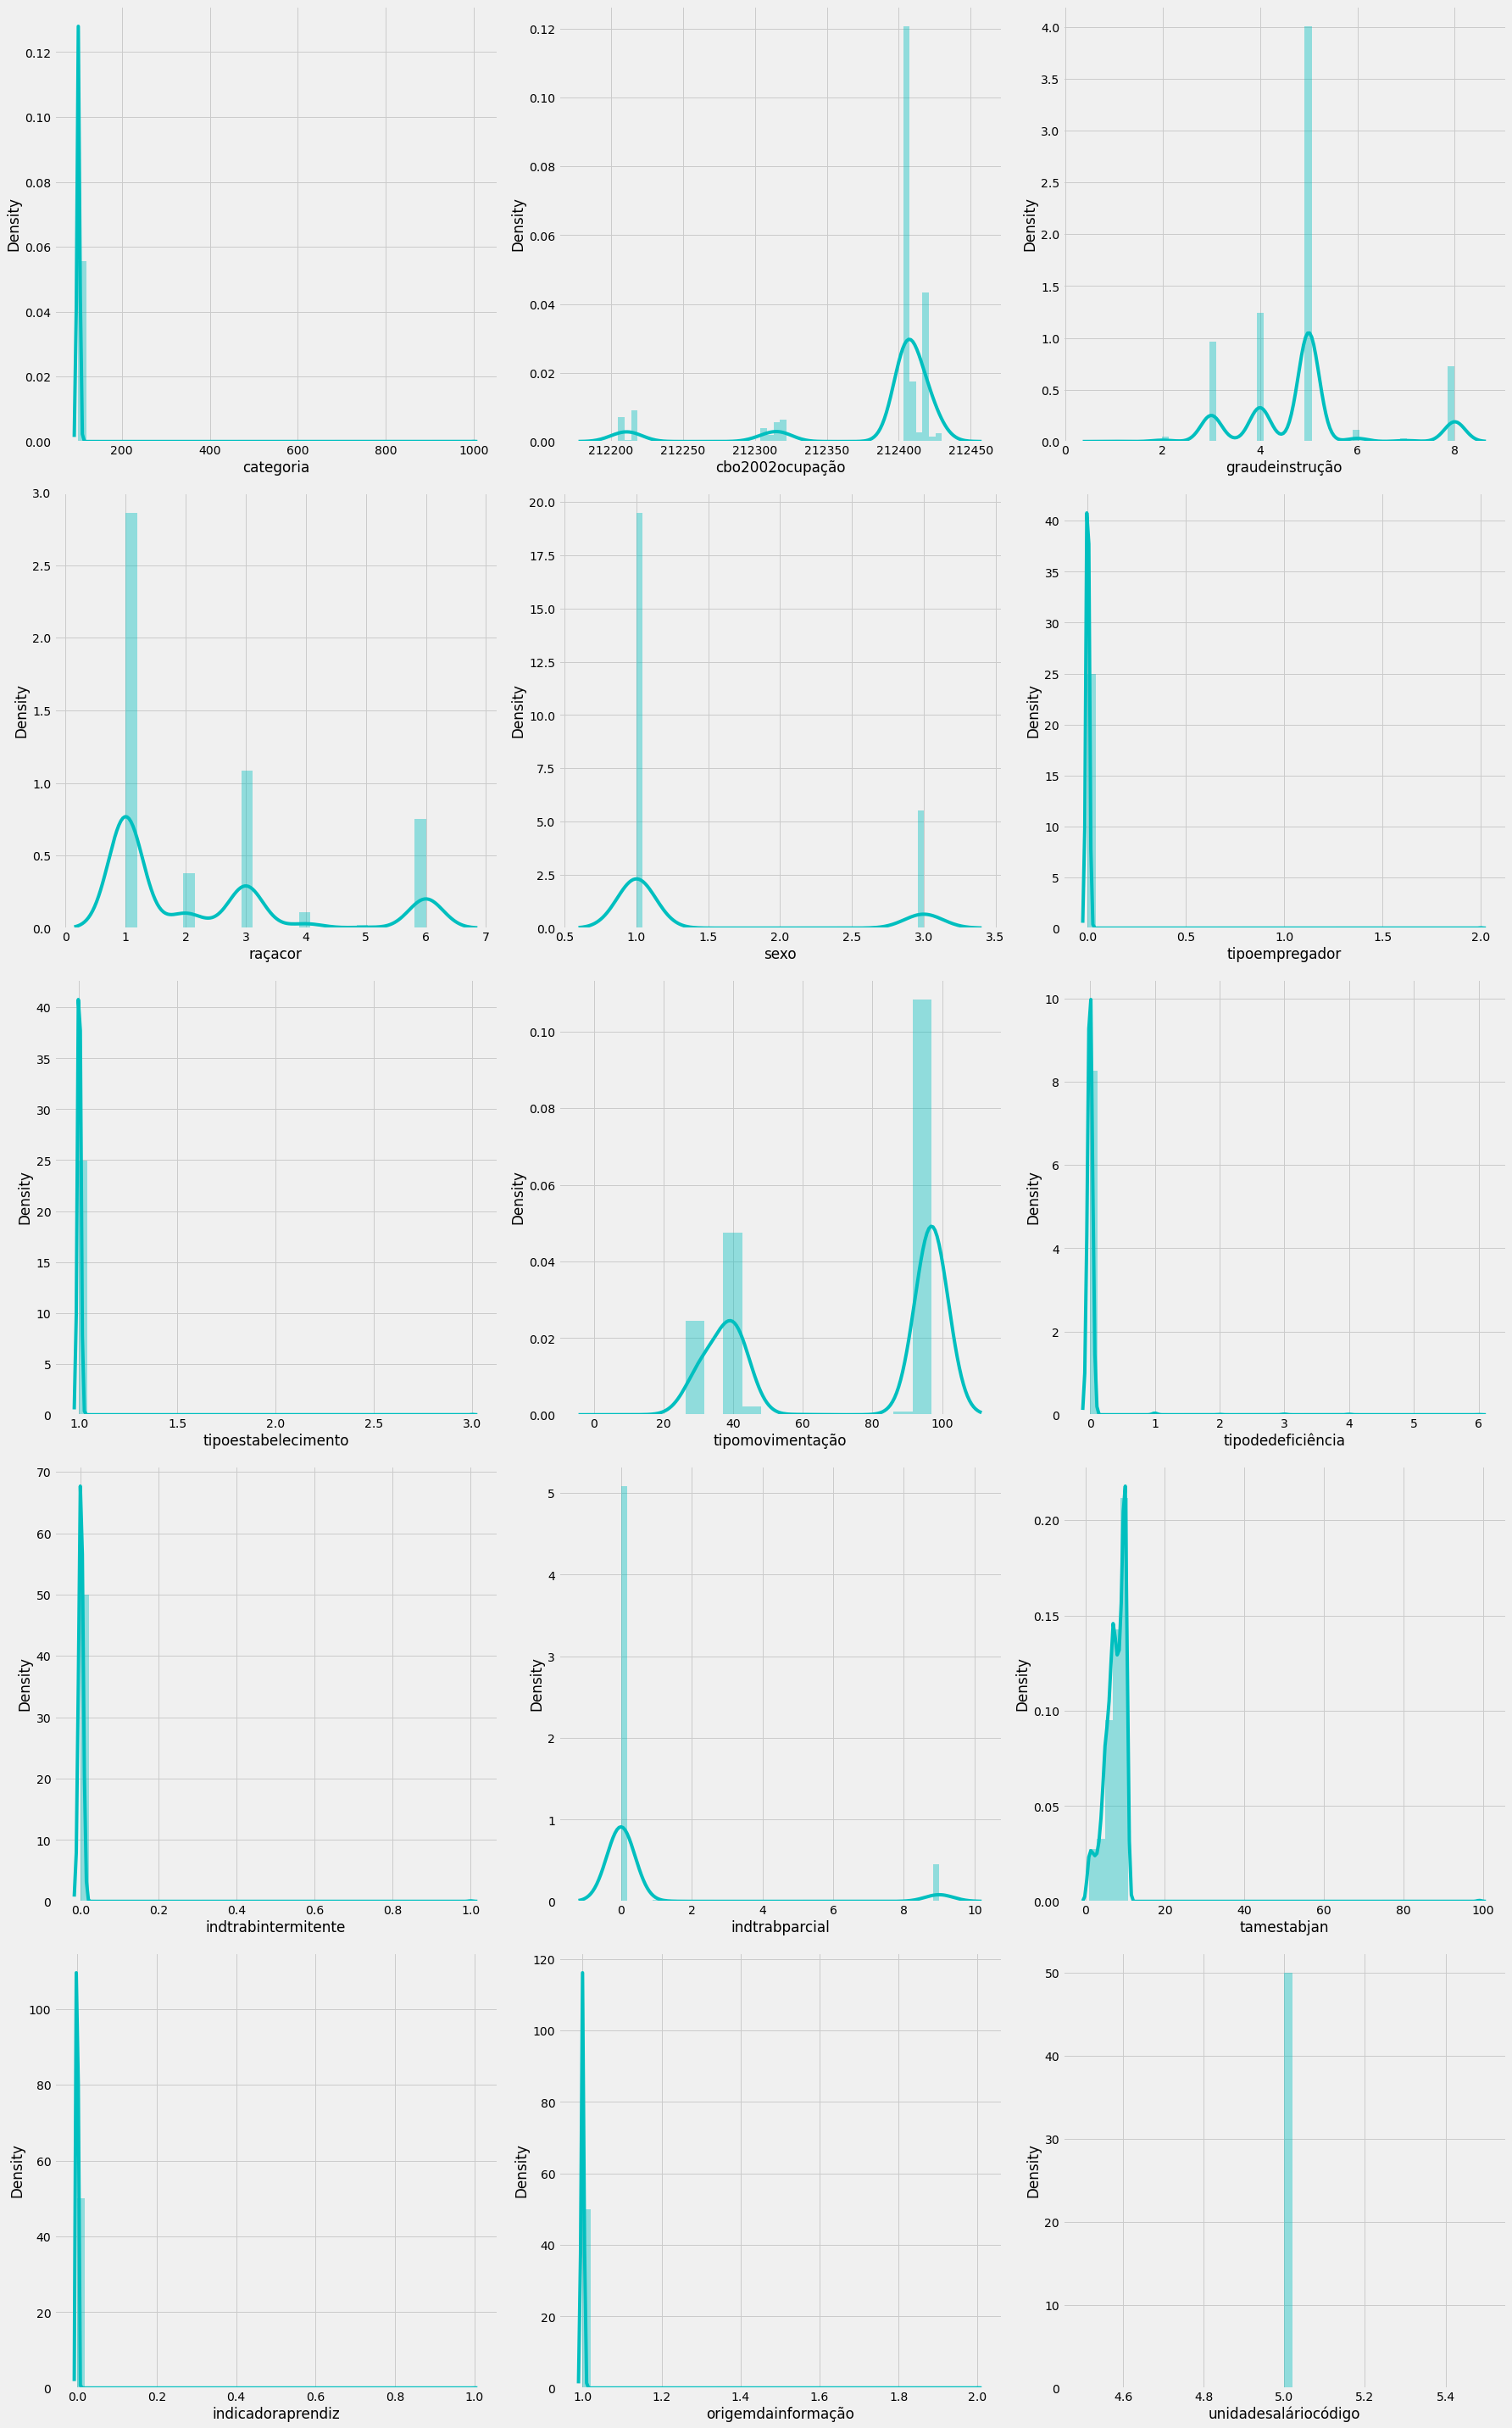

In [22]:
generate_plot(df[var_qua],5,3)

In [23]:
df[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
idade,8920.0,32.02,8.35,17.00,26.0,31.00,37.00,48.0,57.00,72.00
horascontratuais,8920.0,41.43,2.51,0.44,40.0,40.00,44.00,44.0,44.00,56.00
salário,8920.0,7853.78,5973.76,0.00,3500.0,6474.06,10781.41,17500.0,29526.04,73425.04
valorsaláriofixo,8920.0,7853.78,5973.76,0.00,3500.0,6474.06,10781.41,17500.0,29526.04,73425.04


In [24]:
# Employment category 101 = [CLT] 106 = [Temporary]
df.categoria.value_counts()

101    8783
106      71
105      49
111      11
999       4
103       2
Name: categoria, dtype: int64

In [25]:
# To put percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [26]:
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [27]:
# Boxplot function

def grafico_boxplot(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(y="valorsaláriofixo", x=variable, data=data, palette='viridis')
    plt.ylabel(label)
    plt.xticks(rotation = 90)
    plt.show()

In [28]:
# Barplot function

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = True)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", palette='viridis'))

    plt.ylim(0,1)
    plt.xticks(rotation = 90)
    plt.show()

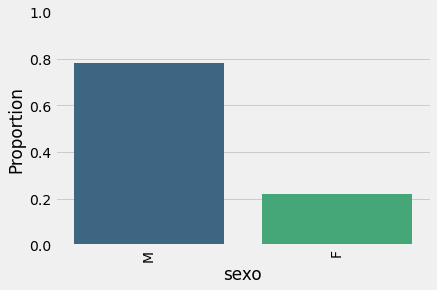

In [29]:
grafico_barras_prop(df.replace(label_quali), variable = "sexo")

<AxesSubplot:xlabel='valorsaláriofixo'>

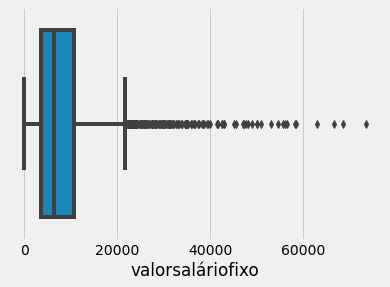

In [30]:
sns.boxplot(x=df.valorsaláriofixo)

In [31]:
df.nlargest(n=3, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
3435944,202207,3,35,355030,N,7810800,-1,212215,101,5,...,0,73425.04,6,0,1,202207,0,5,73425.04,Engenheiros de Sistemas Operacionais em Comput...
3436273,202207,3,35,355030,N,7810800,1,212215,101,5,...,0,68474.00,6,0,1,202207,0,5,68474.00,Engenheiros de Sistemas Operacionais em Comput...
3435854,202207,3,35,355030,N,7810800,1,212215,101,4,...,0,66561.25,6,0,1,202207,0,5,66561.25,Engenheiros de Sistemas Operacionais em Comput...


In [32]:
df.nsmallest(n=3, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2444877,202207,3,35,355030,M,7319003,1,212420,101,4,...,0,0.0,7,0,1,202207,0,5,0.0,Analista de Suporte Computacional
2604178,202207,3,35,355030,J,6209100,1,212405,101,5,...,0,0.0,5,0,1,202207,0,5,0.0,Analista de Desenvolvimento de Sistemas
3435907,202207,3,35,355030,N,7810800,1,212215,101,5,...,0,0.0,7,0,1,202207,0,5,0.0,Engenheiros de Sistemas Operacionais em Comput...


In [33]:
df['valorsaláriofixo'].value_counts()[0]

11

In [34]:
# Interquartile range to detect outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "valorsaláriofixo")
print("Upper limit: ", upper)
print("Lower Limit: ", lower)

Upper limit:  21703.531249999996
Lower Limit:  -7422.118749999998


In [35]:
# Standard deviation to detect outliers
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
upper_limit, lower_limit = outlier_removal(df, "valorsaláriofixo")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  25775.06466129261
Lower Limit:  -10067.506136628883


In [36]:
df[(df['valorsaláriofixo'] < lower_limit) | (df['valorsaláriofixo'] > upper_limit)]

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2444452,202207,3,35,355030,J,6204000,-1,212420,101,8,...,0,33305.34,9,0,1,202207,0,5,33305.34,Analista de Suporte Computacional
2446070,202207,3,35,355030,M,7020400,1,212420,101,5,...,0,39478.46,6,0,1,202207,0,5,39478.46,Analista de Suporte Computacional
2446299,202207,3,35,355030,J,6204000,1,212420,101,5,...,0,35000.00,9,0,1,202207,0,5,35000.00,Analista de Suporte Computacional
2447518,202207,3,35,355030,J,6204000,-1,212420,101,5,...,0,27633.33,9,0,1,202207,0,5,27633.33,Analista de Suporte Computacional
2448188,202207,3,35,355030,J,6204000,1,212420,101,5,...,0,30000.00,9,0,1,202207,0,5,30000.00,Analista de Suporte Computacional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439361,202207,3,35,355030,J,6209100,1,212320,101,5,...,0,31250.00,6,0,1,202207,0,5,31250.00,Administrador em Segurança da Informação
3439574,202207,3,35,355030,J,6203100,1,212320,101,5,...,0,27900.00,4,0,1,202207,0,5,27900.00,Administrador em Segurança da Informação
3455793,202207,3,35,355030,J,6319400,1,212210,101,4,...,0,32000.00,1,0,1,202207,0,5,32000.00,Engenheiro de Equipamentos em Computacao
3455806,202207,3,35,355030,J,6203100,-1,212210,101,8,...,0,32000.50,7,0,1,202207,0,5,32000.50,Engenheiro de Equipamentos em Computacao


In [37]:
# Filtering salary values >= R$ 1212 Brazilian Minimal Wage & <= upper
df = df[(df.valorsaláriofixo >= 1212) & (df['valorsaláriofixo'] < upper)]
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,5,...,0,5000.00,5,0,1,202207,0,5,5000.00,Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,5,...,0,8600.00,10,0,1,202207,0,5,8600.00,Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,4,...,0,5153.59,7,0,1,202207,0,5,5153.59,Analista de Sistemas de Automacao


In [38]:
df.shape

(8663, 29)

In [39]:
# Exporting dataset to csv file to simply the process 
df.to_csv('cagedmov202207.csv')

<AxesSubplot:xlabel='valorsaláriofixo'>

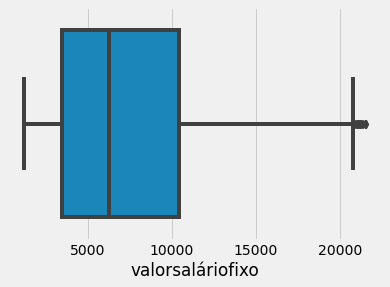

In [40]:
sns.boxplot(x=df.valorsaláriofixo)

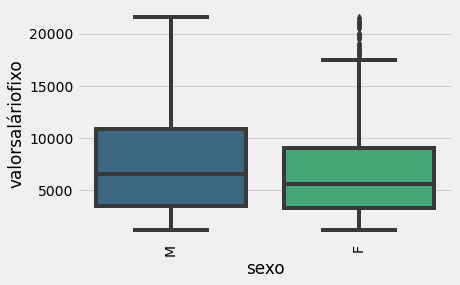

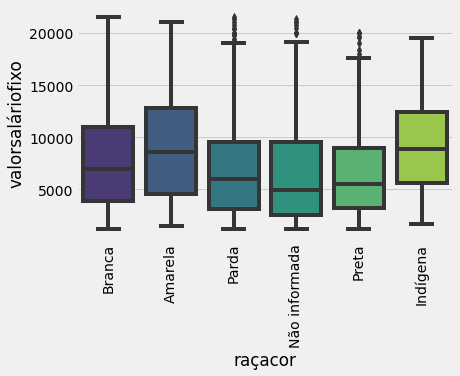

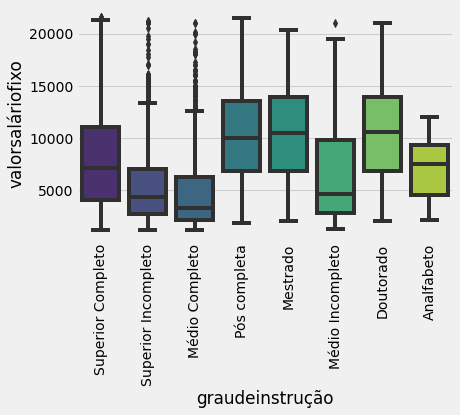

In [41]:
grafico_boxplot(df.replace(label_quali), "sexo", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "raçacor", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "graudeinstrução", "valorsaláriofixo")

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='idade'>

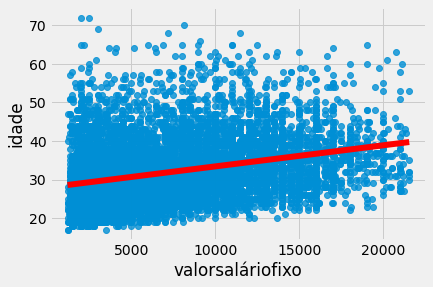

In [42]:
sns.regplot(x=df.valorsaláriofixo , y=df.idade, line_kws={'color': 'red'})

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='graudeinstrução'>

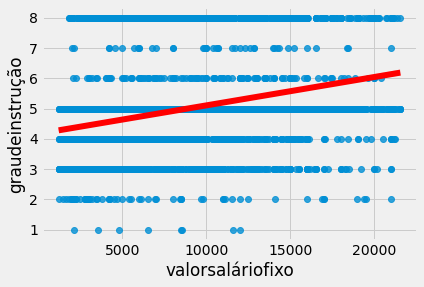

In [43]:
sns.regplot(x=df.valorsaláriofixo , y=df.graudeinstrução, line_kws={'color': 'red'})

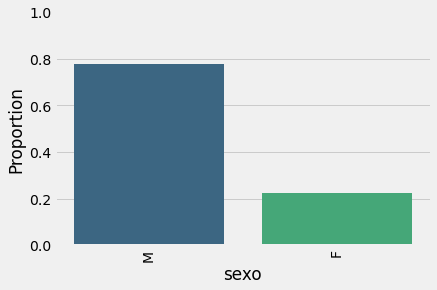

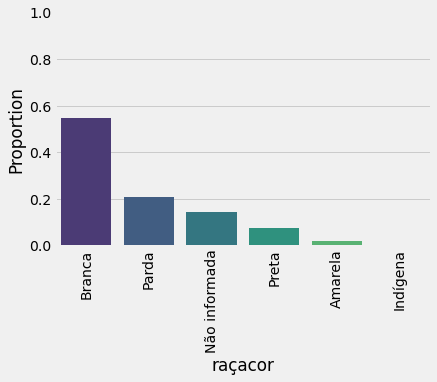

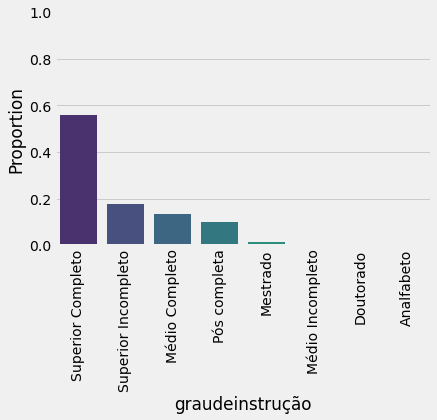

In [44]:
grafico_barras_prop(df.replace(label_quali), variable = "sexo")
grafico_barras_prop(df.replace(label_quali), variable = "raçacor")
grafico_barras_prop(df.replace(label_quali), variable = "graudeinstrução")

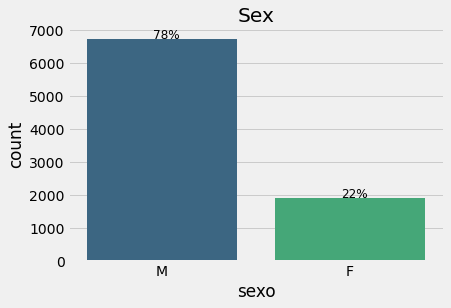

In [45]:
ax = sns.countplot( x=df.replace(label_quali).sexo , data= df, palette='viridis')
ax.set_title('Sex')
percen(ax , df.sexo)

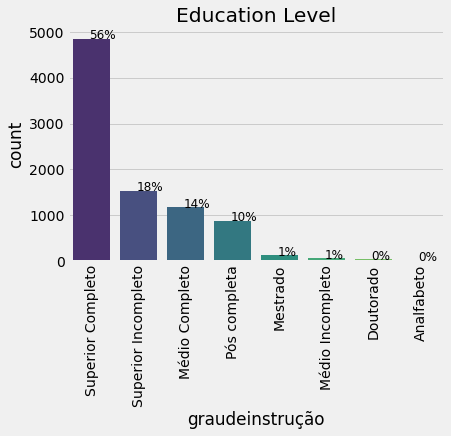

In [47]:
ax = sns.countplot( x='graudeinstrução' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Education Level')
plt.xticks(rotation = 90)
percen(ax , df.graudeinstrução)

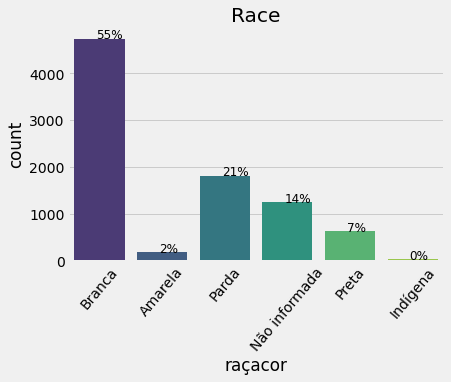

In [48]:
ax = sns.countplot( x='raçacor' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Race')
plt.xticks(rotation = 50)
percen(ax , df.raçacor)

In [49]:
df.replace(label_quali).raçacor.value_counts()

Branca           4744
Parda            1815
Não informada    1248
Preta             635
Amarela           185
Indígena           36
Name: raçacor, dtype: int64

<AxesSubplot:title={'center':'Average Salary by Race'}, xlabel='raçacor', ylabel='valorsaláriofixo'>

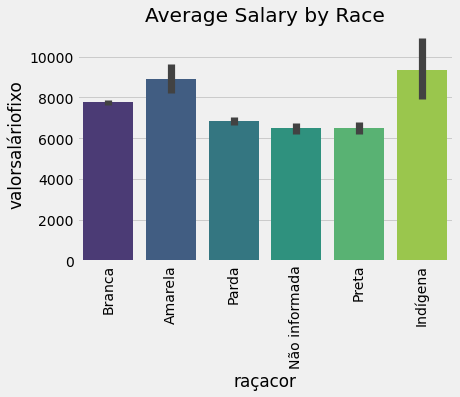

In [50]:
plt.title('Average Salary by Race')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali), x="raçacor", y="valorsaláriofixo", palette='viridis')

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

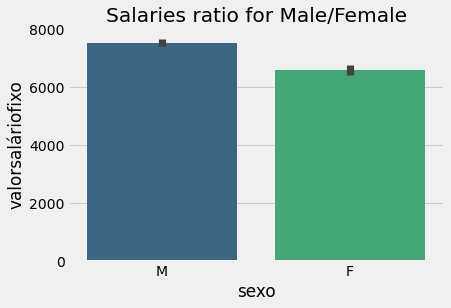

In [51]:
ax = sns.barplot(data=df.replace(label_quali), x="sexo", y="valorsaláriofixo", palette='viridis')
ax.set_title('Salaries ratio for Male/Female')

<AxesSubplot:title={'center':'Average Salary by Education Level'}, xlabel='graudeinstrução', ylabel='valorsaláriofixo'>

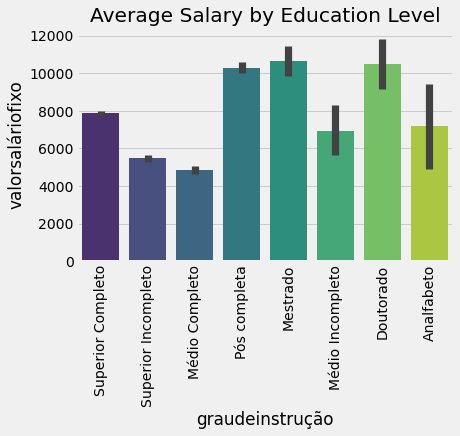

In [52]:
plt.title('Average Salary by Education Level')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali),  x="graudeinstrução", y="valorsaláriofixo", palette='viridis')

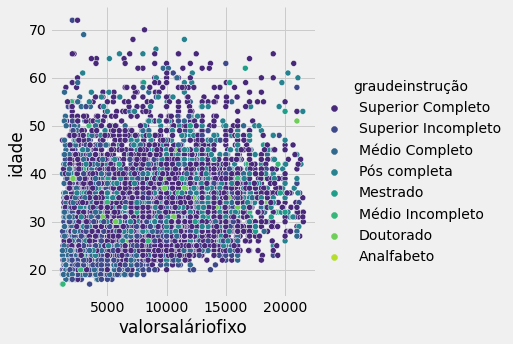

In [53]:
sns.relplot(data=df.replace(label_quali), x='valorsaláriofixo', y='idade', hue='graudeinstrução', palette='viridis')

In [54]:
pd.DataFrame({'Education Level': df.replace(label_quali).groupby('graudeinstrução')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('graudeinstrução')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(10)

,Education Level,Mean salary
5,Pós completa,10620.47
6,Superior Completo,10488.64
7,Superior Incompleto,10269.20
4,Médio Incompleto,7874.66
0,Analfabeto,7204.82
1,Doutorado,6919.84
3,Médio Completo,5477.05
2,Mestrado,4831.62


In [55]:
df.replace(label_quali).graudeinstrução.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Superior Completo       55.9 %
Superior Incompleto    17.77 %
Médio Completo         13.53 %
Pós completa           10.07 %
Mestrado                1.45 %
Médio Incompleto        0.72 %
Doutorado               0.47 %
Analfabeto              0.09 %
Name: graudeinstrução, dtype: object

In [56]:
df.replace(label_quali).graudeinstrução.value_counts()

Superior Completo      4843
Superior Incompleto    1539
Médio Completo         1172
Pós completa            872
Mestrado                126
Médio Incompleto         62
Doutorado                41
Analfabeto                8
Name: graudeinstrução, dtype: int64

In [57]:
df[(df.replace(label_quali)['graudeinstrução'] == 'Analfabeto')]

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2445318,202207,3,35,355030,J,6311900,-1,212420,101,1,...,0,8541.87,9,0,1,202207,0,5,8541.87,Analista de Suporte Computacional
2448678,202207,3,35,355030,J,6202300,-1,212420,101,1,...,0,4795.88,8,0,1,202207,0,5,4795.88,Analista de Suporte Computacional
2602495,202207,3,35,355030,J,6204000,1,212405,101,1,...,0,12000.00,5,0,1,202207,0,5,12000.00,Analista de Desenvolvimento de Sistemas
2605241,202207,3,35,355030,M,7020400,-1,212405,101,1,...,0,3565.78,10,0,1,202207,0,5,3565.78,Analista de Desenvolvimento de Sistemas
2605592,202207,3,35,355030,N,8211300,1,212405,101,1,...,0,6500.00,9,0,1,202207,0,5,6500.00,Analista de Desenvolvimento de Sistemas
2610595,202207,3,35,355030,J,6204000,1,212405,101,1,...,0,2122.10,8,0,1,202207,0,5,2122.10,Analista de Desenvolvimento de Sistemas
2612525,202207,3,35,355030,N,8211300,1,212405,101,1,...,0,8500.00,9,0,1,202207,0,5,8500.00,Analista de Desenvolvimento de Sistemas
3230379,202207,3,35,355030,N,8211300,-1,212315,101,1,...,9,11612.91,10,0,1,202207,0,5,11612.91,Administrador de Sistemas Operacionais


<AxesSubplot:xlabel='valorsaláriofixo', ylabel='Density'>

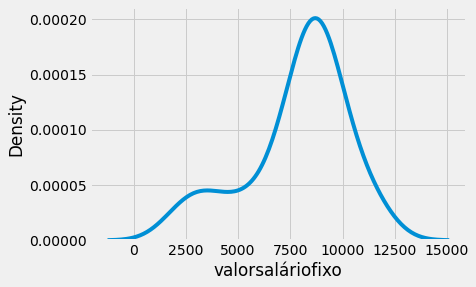

In [58]:
sns.kdeplot(df.groupby('idade')['valorsaláriofixo'].mean().round(2), x=df.idade)

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='Density'>

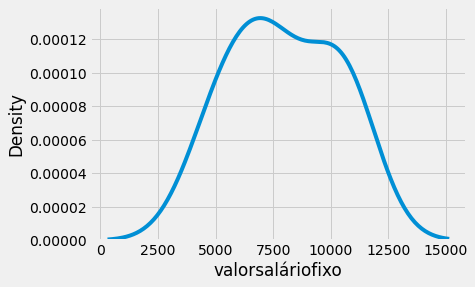

In [59]:
sns.kdeplot(df.groupby('graudeinstrução')['valorsaláriofixo'].mean().round(2), x=df.graudeinstrução)

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='Density'>

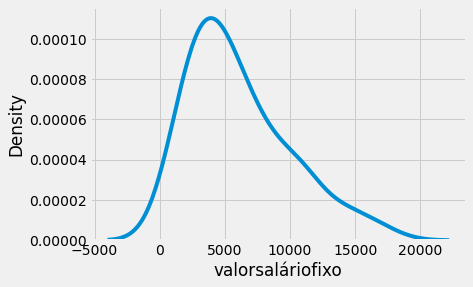

In [60]:
sns.kdeplot(df.groupby('horascontratuais')['valorsaláriofixo'].mean().round(2), x=df.graudeinstrução)

<AxesSubplot:>

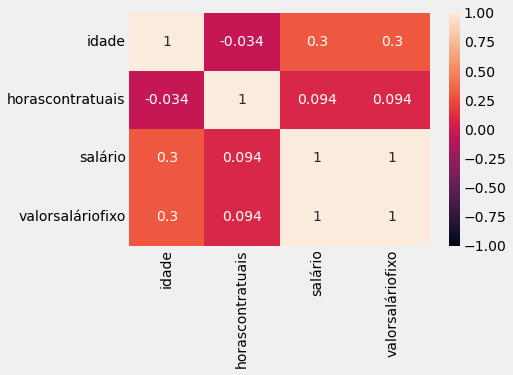

In [61]:
sns.heatmap(data=df[var_quant].corr(), annot=True, vmin=-1, vmax=1 )

<AxesSubplot:>

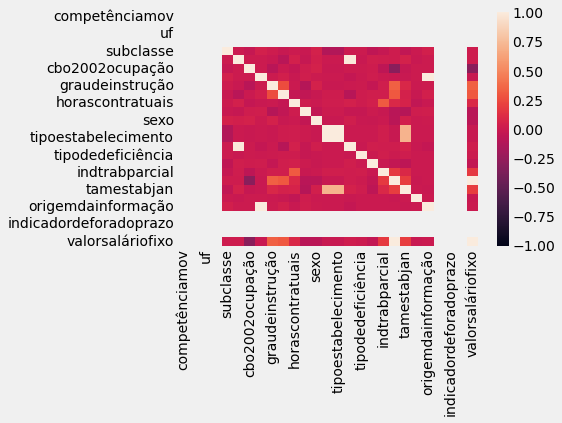

In [62]:
sns.heatmap(data=df.corr(), vmin=-1, vmax=1 )

<AxesSubplot:title={'center':'Occupattion'}, xlabel='Descrição', ylabel='valorsaláriofixo'>

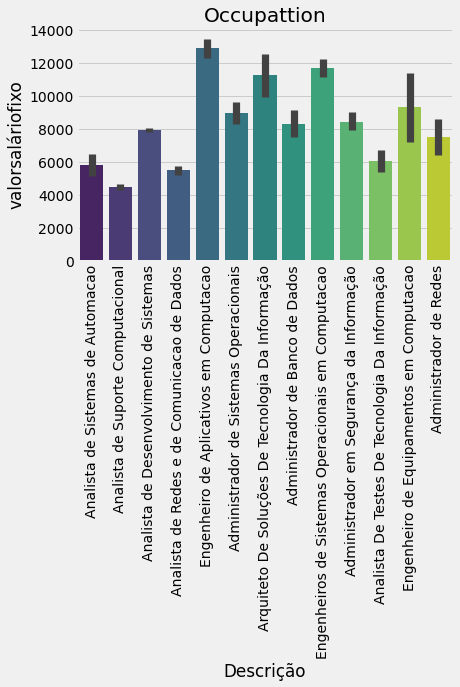

In [63]:
plt.xticks(rotation = 90)
plt.title('Occupattion')
sns.barplot(data=df.replace(label_quali), x="Descrição", y="valorsaláriofixo", palette='viridis')

In [64]:
pd.DataFrame({'Occupattion': df.groupby('Descrição')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('Descrição')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
10,Engenheiro de Aplicativos em Computacao,12913.05
12,Engenheiros de Sistemas Operacionais em Comput...,11654.87
9,Arquiteto De Soluções De Tecnologia Da Informação,11244.81
11,Engenheiro de Equipamentos em Computacao,9309.97
2,Administrador de Sistemas Operacionais,8933.11
3,Administrador em Segurança da Informação,8409.05
0,Administrador de Banco de Dados,8290.23
5,Analista de Desenvolvimento de Sistemas,7907.17
1,Administrador de Redes,7489.98
4,Analista De Testes De Tecnologia Da Informação,6047.78


In [65]:
df.Descrição.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Analista de Desenvolvimento de Sistemas               55.44 %
Analista de Suporte Computacional                     19.49 %
Analista de Redes e de Comunicacao de Dados            7.91 %
Engenheiros de Sistemas Operacionais em Computacao     3.31 %
Administrador em Segurança da Informação               2.87 %
Engenheiro de Aplicativos em Computacao                2.77 %
Administrador de Sistemas Operacionais                  2.5 %
Administrador de Banco de Dados                        1.75 %
Analista de Sistemas de Automacao                      1.19 %
Analista De Testes De Tecnologia Da Informação         1.14 %
Administrador de Redes                                 0.84 %
Arquiteto De Soluções De Tecnologia Da Informação      0.63 %
Engenheiro de Equipamentos em Computacao               0.14 %
Name: Descrição, dtype: object

In [66]:
pd.DataFrame({'Age': df.groupby('idade')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('idade')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]


,Age,Mean salary
43,60.0,11866.87
46,63.0,11371.97
45,62.0,11257.61
44,61.0,11180.43
42,59.0,10666.10
41,58.0,10458.10
36,53.0,10017.96
28,45.0,9913.82
22,39.0,9658.93
33,50.0,9487.41


In [67]:
pd.DataFrame({'Weekly working hours': df.groupby('horascontratuais')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('horascontratuais')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Weekly working hours,Mean salary
38,43.00,17000.00
50,48.00,15323.08
47,44.92,14000.00
29,40.80,13765.98
23,38.80,11571.25
31,41.00,11399.20
5,24.00,11000.00
6,25.00,10879.78
53,56.00,10668.72
35,42.50,10225.53


### Modeling